In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
data = pd.read_csv("C:/Users/xinji/Documents/2023 Spring/CS 5630/Final Project/SanFrancisco.csv", index_col=0)
data

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,violent,street1,street2,str1,str2
0,2015-05-13 23:53:00,WARRANTS,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,True,OAK ST,LAGUNA ST,OAK ST,LAGUNA ST
1,2015-05-13 23:53:00,OTHER OFFENSES,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,False,OAK ST,LAGUNA ST,OAK ST,LAGUNA ST
2,2015-05-13 23:33:00,OTHER OFFENSES,2,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,False,VANNESS AV,GREENWICH ST,VANNESS AV,GREENWICH ST
3,2015-05-13 23:30:00,LARCENY/THEFT,2,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,False,1500 Block of LOMBARD ST,NaN,other,other
4,2015-05-13 23:30:00,LARCENY/THEFT,2,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,False,100 Block of BRODERICK ST,NaN,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,0,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,True,FARALLONES ST,CAPITOL AV,other,CAPITOL AV
878045,2003-01-06 00:01:00,LARCENY/THEFT,0,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,False,600 Block of EDNA ST,NaN,other,other
878046,2003-01-06 00:01:00,LARCENY/THEFT,0,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,False,5TH ST,FOLSOM ST,5TH ST,FOLSOM ST
878047,2003-01-06 00:01:00,VANDALISM,0,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,True,TOWNSEND ST,2ND ST,other,2ND ST


# Logistic Regression (Simple Set of Predictors)

In [3]:
data1 = pd.get_dummies(data.drop(columns = ["Dates", "Category", "PdDistrict", "Address", "street1", "street2", "str1", "str2"]))
data1

,DayOfWeek,X,Y,year,month,day,hour,violent
0,2,-122.425892,37.774599,2015,5,13,23,True
1,2,-122.425892,37.774599,2015,5,13,23,False
2,2,-122.424363,37.800414,2015,5,13,23,False
3,2,-122.426995,37.800873,2015,5,13,23,False
4,2,-122.438738,37.771541,2015,5,13,23,False
...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True
878045,0,-122.447364,37.731948,2003,1,6,0,False
878046,0,-122.403390,37.780266,2003,1,6,0,False
878047,0,-122.390531,37.780607,2003,1,6,0,True


In [4]:
data1["PdDistrict"] = data["PdDistrict"].map({d:i for i, d in enumerate(data["PdDistrict"].drop_duplicates())})

In [5]:
data1.dtypes

DayOfWeek       int64
X             float64
Y             float64
year            int64
month           int64
day             int64
hour            int64
violent          bool
PdDistrict      int64
dtype: object

In [6]:
X1 = data1.loc[:, data1.columns != 'violent']
y1 = data1.violent

In [7]:
# Split dataset into 70% training set and 30% test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1) 

In [8]:
# Tune hyperparameters
logisticRegr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1]
max_iter = [1000]

# Define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values, max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logisticRegr, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy',error_score=0, verbose = True)

In [9]:
# Fit the model and return the best parameters
grid_result1 = grid_search.fit(X_train1, y_train1)
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Fitting 15 folds for each of 12 candidates, totalling 180 fits


C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

Best: 0.545712 using {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [10]:
# Predict the response for train dataset
model_lr1 = LogisticRegression(solver='newton-cg',penalty='l2',C=100,max_iter=1000)
model_lr1.fit(X_train1, y_train1)
y_pred_lr11 = model_lr1.predict(X_train1)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of logistic regression model 1:", metrics.accuracy_score(y_train1, y_pred_lr11))
print("Sensitivity of logistic regression model 1:", metrics.recall_score(y_train1, y_pred_lr11))
print("Specificity of logistic regression model 1:", metrics.recall_score(y_train1, y_pred_lr11, pos_label=0))
print("Kappa of logistic regression model 1:", metrics.cohen_kappa_score(y_train1, y_pred_lr11))

C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

Accuracy of logistic regression model 1: 0.5457111849095408
Sensitivity of logistic regression model 1: 0.5655110991074415
Specificity of logistic regression model 1: 0.5254256829539053
Kappa of logistic regression model 1: 0.09096882484416213


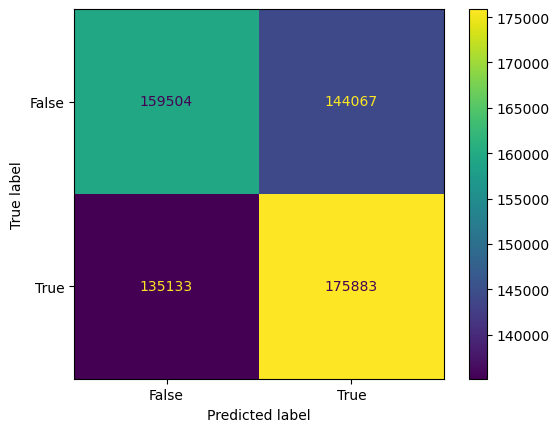

In [11]:
# Confusion matrix for train dataset
confusion_matrix11 = metrics.confusion_matrix(y_train1, y_pred_lr11)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix11, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [12]:
# Predict the response for test dataset
y_pred_lr1 = model_lr1.predict(X_test1)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of logistic regression model 1:", metrics.accuracy_score(y_test1, y_pred_lr1))
print("Sensitivity of logistic regression model 1:", metrics.recall_score(y_test1, y_pred_lr1))
print("Specificity of logistic regression model 1:", metrics.recall_score(y_test1, y_pred_lr1, pos_label=0))
print("Kappa of logistic regression model 1:", metrics.cohen_kappa_score(y_test1, y_pred_lr1))

Accuracy of logistic regression model 1: 0.5465783329220373
Sensitivity of logistic regression model 1: 0.5646535587535003
Specificity of logistic regression model 1: 0.5279850889962029
Kappa of logistic regression model 1: 0.09266987745027822


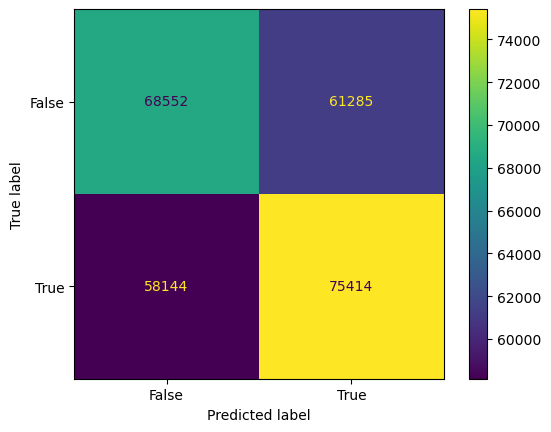

In [13]:
# Confusion matrix for test dataset
confusion_matrix1 = metrics.confusion_matrix(y_test1, y_pred_lr1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

# Logistic Regression (with PdDistrict)

In [14]:
data2 = pd.get_dummies(data.drop(columns = ["Dates", "Category", "Address", "street1", "street2", "str1", "str2"]))
data2

,DayOfWeek,X,Y,year,month,day,hour,violent,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2,-122.425892,37.774599,2015,5,13,23,True,0,0,0,0,1,0,0,0,0,0
1,2,-122.425892,37.774599,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
2,2,-122.424363,37.800414,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
3,2,-122.426995,37.800873,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
4,2,-122.438738,37.771541,2015,5,13,23,False,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True,0,0,0,0,0,0,0,0,1,0
878045,0,-122.447364,37.731948,2003,1,6,0,False,0,0,1,0,0,0,0,0,0,0
878046,0,-122.403390,37.780266,2003,1,6,0,False,0,0,0,0,0,0,0,1,0,0
878047,0,-122.390531,37.780607,2003,1,6,0,True,0,0,0,0,0,0,0,1,0,0


In [15]:
X2 = data2.loc[:, data2.columns != 'violent']
y2 = data2.violent

In [16]:
# Split dataset into 70% training set and 30% test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1) 

In [17]:
# Fit the model and return the best parameters
grid_result2 = grid_search.fit(X_train2, y_train2)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Fitting 15 folds for each of 12 candidates, totalling 180 fits
Best: 0.559094 using {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [18]:
# Predict the response for train dataset
model_lr2 = LogisticRegression(solver='liblinear',penalty='l2',C=100,max_iter=1000)
model_lr2.fit(X_train2, y_train2)
y_pred_lr22 = model_lr2.predict(X_train2)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of logistic regression model 2:", metrics.accuracy_score(y_train2, y_pred_lr22))
print("Sensitivity of logistic regression model 2:", metrics.recall_score(y_train2, y_pred_lr22))
print("Specificity of logistic regression model 2:", metrics.recall_score(y_train2, y_pred_lr22, pos_label=0))
print("Kappa of logistic regression model 2:", metrics.cohen_kappa_score(y_train2, y_pred_lr22))

Accuracy of logistic regression model 2: 0.5590713763877205
Sensitivity of logistic regression model 2: 0.58605988116367
Specificity of logistic regression model 2: 0.531420985535509
Kappa of logistic regression model 2: 0.11754345378488062


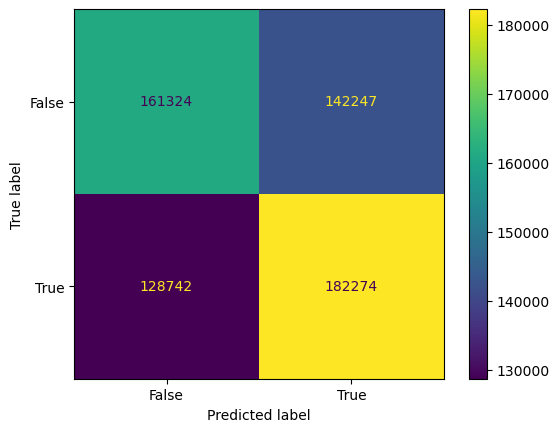

In [19]:
# Confusion matrix for train dataset
confusion_matrix22 = metrics.confusion_matrix(y_train2, y_pred_lr22)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix22, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [20]:
# Predict the response for test dataset
y_pred_lr2 = model_lr2.predict(X_test2)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of logistic regression model 2:", metrics.accuracy_score(y_test2, y_pred_lr2))
print("Sensitivity of logistic regression model 2:", metrics.recall_score(y_test2, y_pred_lr2))
print("Specificity of logistic regression model 2:", metrics.recall_score(y_test2, y_pred_lr2, pos_label=0))
print("Kappa of logistic regression model 2:", metrics.cohen_kappa_score(y_test2, y_pred_lr2))

Accuracy of logistic regression model 2: 0.560701607851326
Sensitivity of logistic regression model 2: 0.5851540154839097
Specificity of logistic regression model 2: 0.5355484184015342
Kappa of logistic regression model 2: 0.12076588447557468


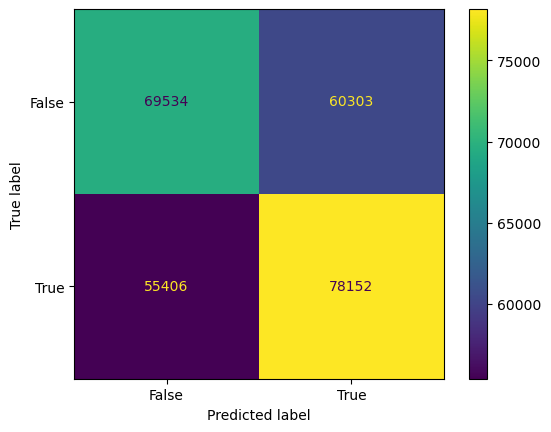

In [21]:
# Confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_test2, y_pred_lr2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, 
                                            display_labels = [False, True])

cm_display.plot(values_format='')
plt.show()

# Logistic Regression (with PdDistrict + str1 + str2)

In [22]:
data3 = pd.get_dummies(data.drop(columns = ["Dates", "Category", "Address", "street1", "street2"]))
data3

,DayOfWeek,X,Y,year,month,day,hour,violent,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,...,str2_VANNESS AV,str2_VERMONT ST,str2_VICENTE ST,str2_WALLER ST,str2_WASHINGTON ST,str2_WEBSTER ST,str2_WINSTON DR,str2_WISCONSIN ST,str2_YORK ST,str2_other
0,2,-122.425892,37.774599,2015,5,13,23,True,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,-122.425892,37.774599,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-122.424363,37.800414,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-122.426995,37.800873,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,-122.438738,37.771541,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True,0,0,...,0,0,0,0,0,0,0,0,0,0
878045,0,-122.447364,37.731948,2003,1,6,0,False,0,0,...,0,0,0,0,0,0,0,0,0,1
878046,0,-122.403390,37.780266,2003,1,6,0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
878047,0,-122.390531,37.780607,2003,1,6,0,True,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data3 = data3.sample(5000)

In [24]:
X3 = data3.loc[:, data3.columns != 'violent']
y3 = data3.violent

In [25]:
# Split dataset into 70% training set and 30% test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=1) 

In [26]:
# Fit the model and return the best parameters
grid_result3 = grid_search.fit(X_train3, y_train3)
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Fitting 15 folds for each of 12 candidates, totalling 180 fits


C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

Best: 0.575810 using {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}


In [27]:
# Predict the response for train dataset
model_lr3 = LogisticRegression(solver='newton-cg',penalty='l2',C=100,max_iter=1000)
model_lr3.fit(X_train3, y_train3)
y_pred_lr33 = model_lr3.predict(X_train3)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of logistic regression model 3:", metrics.accuracy_score(y_train3, y_pred_lr33))
print("Sensitivity of logistic regression model 3:", metrics.recall_score(y_train3, y_pred_lr33))
print("Specificity of logistic regression model 3:", metrics.recall_score(y_train3, y_pred_lr33, pos_label=0))
print("Kappa of logistic regression model 3:", metrics.cohen_kappa_score(y_train3, y_pred_lr33))

C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

Accuracy of logistic regression model 3: 0.6425714285714286
Sensitivity of logistic regression model 3: 0.7547914317925591
Specificity of logistic regression model 3: 0.5272305909617613
Kappa of logistic regression model 3: 0.28286676406422995


C:\Users\xinji\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\xinji\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


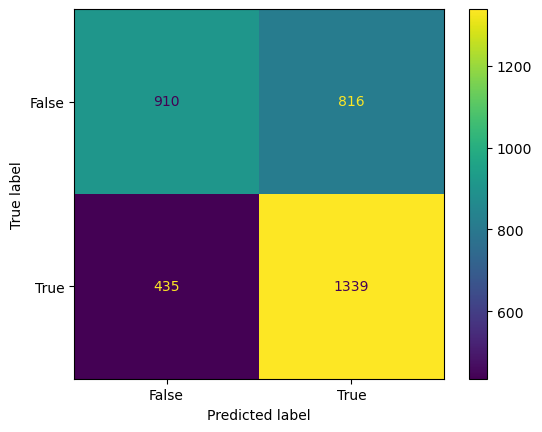

In [28]:
# Confusion matrix for train dataset
confusion_matrix33 = metrics.confusion_matrix(y_train3, y_pred_lr33)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix33, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [29]:
# Predict the response for test dataset
y_pred_lr3 = model_lr3.predict(X_test3)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of logistic regression model 3:", metrics.accuracy_score(y_test3, y_pred_lr3))
print("Sensitivity of logistic regression model 3:", metrics.recall_score(y_test3, y_pred_lr3))
print("Specificity of logistic regression model 3:", metrics.recall_score(y_test3, y_pred_lr3, pos_label=0))
print("Kappa of logistic regression model 3:", metrics.cohen_kappa_score(y_test3, y_pred_lr3))

Accuracy of logistic regression model 3: 0.552
Sensitivity of logistic regression model 3: 0.6783042394014963
Specificity of logistic regression model 3: 0.4068767908309456
Kappa of logistic regression model 3: 0.0864335380398924


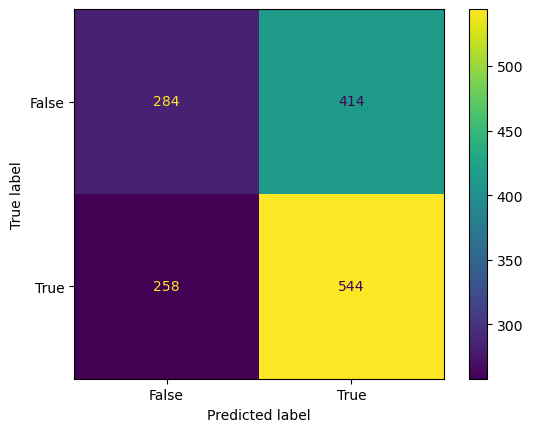

In [30]:
# Confusion matrix
confusion_matrix3 = metrics.confusion_matrix(y_test3, y_pred_lr3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()